<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Em setembro de 2021, a Startup fundada 15 anos atrás, já havia **hospedado mais de 1 Bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados nesta análise, foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Será baixado o arquivo `listings.csv` - *Summary information and metrics for listings in Toronto (good for visualisations)*, para a exploração inicial.

O portal de origem dos dados é atualizado com frequência, logo este específico [conjunto de dados](http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/listings.csv), do dia 2021-dez-05, poderá não estar mais disponível quando você for executá-lo. Neste caso o código não funcionará corretamente.

Caso isso ocorra, acesse o conjunto de dados original desta pesquisa [aqui](https://drive.google.com/file/d/1AHo7Qjplhxr0jzqTAxy6i7ztMBlgmjMa/view?usp=sharing), para que você também possa executar os códigos e fazer a sua própria reprodução.

Vamos ao que temos em mente para explorar!

In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Identificador único do imóvel - tipo integer
* `name` - Headline do anúncio do imóvel - tipo string
* `host_id` - Código do proprietário(anfitrião) do imóvel - tipo integer
* `host_name` - Nome do Anfitrião - tipo string
* `neighbourhood_group` - Sem dados - tipo string
* `neighbourhood` - Nome do bairro - tipo string 
* `latitude` - coordenada latitudinal do imóvel - tipo float
* `longitude` - coordenada longitudinal do imóvel - tipo float
* `room_type` - Tipo de acomodação - tipo string
* `price` - Preço da locação do imóvel em US$ - tipo float
* `minimum_nights` - Quantidade mínima de diárias para locar o imóvel - tipo integer
* `number_of_reviews` - Quantidade de avaliações do imóvel - tipo integer
* `last_review` - Data da última avaliação - tipo string
* `reviews_per_month` - Média de avaliações mensais - tipo float
* `calculated_host_listings_count` - Quantidade de imóveis anúnciados pelo mesmo anfitrião - tipo integer
* `availability_365` - Quantidade de dias de disponibilidade do imóvel em 365 dias - tipo integer 
* `number_of_reviews_ltm` - Quantidade de avaliações do imóvel em 12 meses - tipo integer
* `license` - Numero de registro/licença/permissão - tipo string

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Aqui identificaremos a quantidade de entradas em nosso conjunto de dados (dataset) e os tipos de cada uma das colunas.

O dataset é uma versão resumida do dataset completo do AirBnB. Ambos estão disponíveis na mesma página.

In [5]:
# identificar o volume de dados do DataFrame
print("Total de entradas:\t {}".format(df.shape[0]))
print("Total de colunas:\t {}\n".format(df.shape[1]))

# verificar os tipos de colunas
display(df.dtypes)

Total de entradas:	 15261
Total de colunas:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A quantidade de valores ausentes em um dataset, se não tratados adequadamente, poderão impactar no resultado pretendido.

Em nosso primeiro contato com os dados crus, podemos vislumbrar uma coluna com dados NaN (Not a Number). Caso a pesquisa que esteja realizando necessite das informações de uma coluna que esteja com um percentual muito alto de ausentes, poderá invalidar a massa de dados.

Efetuar esta análise prévia ajudará a entender os dados e conseguir extrair a maior quantidade de informações relevantes para a pesquisa.

Vejamos o que encontraremos neste dataset.

* Note que a coluna `neighbourhood_group` está com 100% dos valores ausentes.
* A variável `licence` possui mais de 65% de valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem quase 25% de seus valores nulos.
* Já as colunas `host_name` e `name` os valores ausentes representam menos de 1%.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            66.863246
reviews_per_month                  22.842540
last_review                        22.842540
host_name                           0.072079
name                                0.006553
number_of_reviews                   0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
id                                  0.000000
minimum_nights                      0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Abaixo vamos plotar um histograma para verificarmos a distribuição das variáveis.

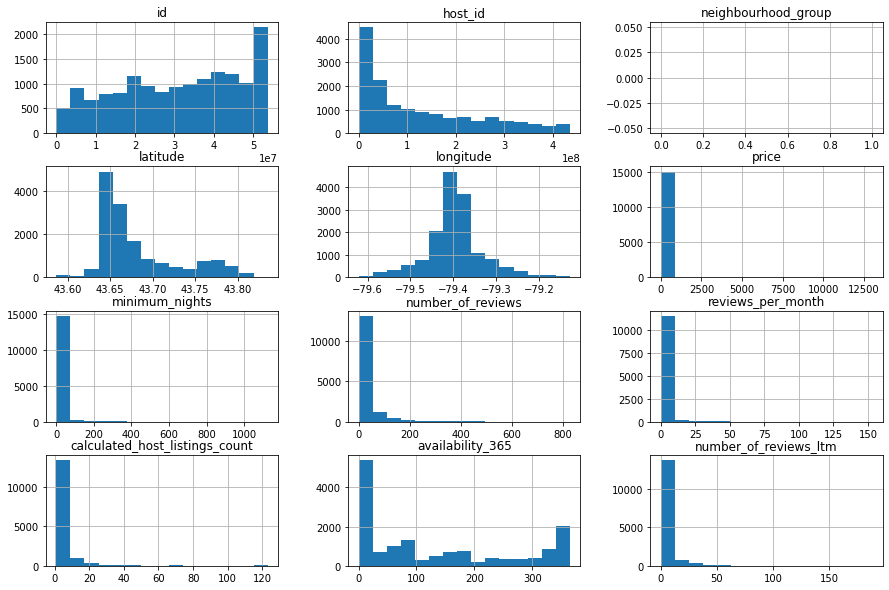

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 ,figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

A média geral de preços é de US$ 155,46.



In [8]:
# ver a média da coluna `price``
df.price.mean()

155.4516742022148

Abaixo listamos uma média geral de preços por bairro, do mais alto para o mais baixo.

In [9]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Annex                                338.396000
Forest Hill South                    289.875000
Palmerston-Little Italy              253.496212
Bridle Path-Sunnybrook-York Mills    237.769231
Rosedale-Moore Park                  227.805556
                                        ...    
Malvern                               60.225000
Glenfield-Jane Heights                56.942857
Black Creek                           54.040000
Eglinton East                         52.735294
Mount Olive-Silverstone-Jamestown     51.133333
Name: price, Length: 140, dtype: float64

### **Q5. Qual a correlação existente entre as variáveis**

Buscamos identificar uma relação ou semelhança entre as variáveis entre si. Com isso poderemos identificar áreas de interesse para aprofundar pesquisas sobre este dataset e a cidade de Toronto.

Criaremos uma matriz de correlação e um mapa de calor (heatmap) com base nesta matriz inicial.

In [10]:
# criar uma matriz de correlação
matrix = df[['price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(matrix)


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.015111,-0.012267,0.000926,0.023796
minimum_nights,0.015111,1.000000,-0.082600,-0.020666,0.045044
number_of_reviews,-0.012267,-0.082600,1.000000,-0.066852,0.008679
calculated_host_listings_count,0.000926,-0.020666,-0.066852,1.000000,0.140595
availability_365,0.023796,0.045044,0.008679,0.140595,1.000000


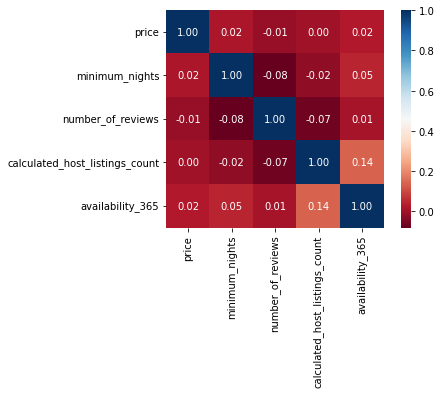

In [11]:
# plotar um heatmap a partir das correlações
sns.heatmap(matrix, cmap='RdBu', fmt='.2f',square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

O tipo de imóvel é descrito na variável `room_type`, a qual contém os tipos de locação oferecidos na plataforma do Airbnb. São eles:

* Casas ou apartamentos inteiros - `Entire home/apt`
* Quarto privativo - `Private room`
* Quarto compartilhado - `Shared room`
* Quarto de hotel - `Hotel room`

Abaixo apresentaremos a quantidade de cada um destes tipos de locações, utilizando o método `value_counts()`. E logo abaixo o percentual representativo.

In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    10057
Private room        4995
Shared room          189
Hotel room            20
Name: room_type, dtype: int64

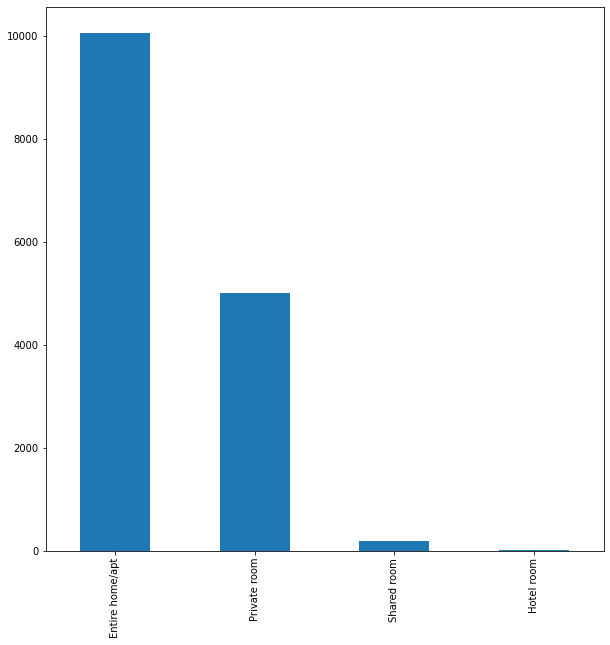

In [100]:
df.room_type.value_counts().plot(kind='bar', figsize=(10,10));

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    65.900007
Private room       32.730489
Shared room         1.238451
Hotel room          0.131053
Name: room_type, dtype: float64

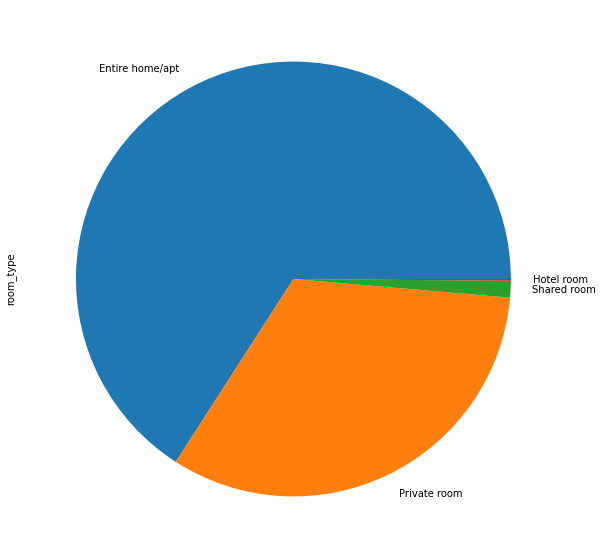

In [101]:
(df.room_type.value_counts() / df.shape[0] * 100).plot(kind='pie',figsize=(10,10))

### **Q7. Qual a localidade mais cara do dataset?**

Na média de preços por bairro apresentada anteriormente, listamos as 5 primeiras e as 5 últimas. Nesta questão apresentaremos as 10 mais caras sendo o bairro de Annex o com as médias mais altas.

Entenda um pouco mais sobre o bairro.

Ao lado do Campus St. George da Universidade de Toronto, o Annex é uma área animada que atrai estudantes para seus restaurantes casuais, livrarias alternativas, bares e cafés na Bloor Street West. Ele também tem o icônico espaço de shows de rock Lee's Palace, o peculiar Hot Docs Ted Rogers Cinema e o Museu de Arte e História Natural Royal Ontario Museum, um dos maiores da América do Norte. Ruas residenciais arborizadas têm casas majestosas. (fonte [Google Maps](https://www.google.com/maps/place/The+Annex,+Toronto,+ON,+Canad%C3%A1/@43.6711661,-79.4086215,16z/data=!3m1!4b1!4m5!3m4!1s0x882b34983e2d98c1:0xf0131ea54abb8012!8m2!3d43.6698329!4d-79.407585)).

In [14]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Annex                                338.396000
Forest Hill South                    289.875000
Palmerston-Little Italy              253.496212
Bridle Path-Sunnybrook-York Mills    237.769231
Rosedale-Moore Park                  227.805556
Waterfront Communities-The Island    218.345715
Princess-Rosethorn                   216.714286
Clairlea-Birchmount                  214.987805
Kingsway South                       207.800000
Casa Loma                            193.925926
Name: price, dtype: float64

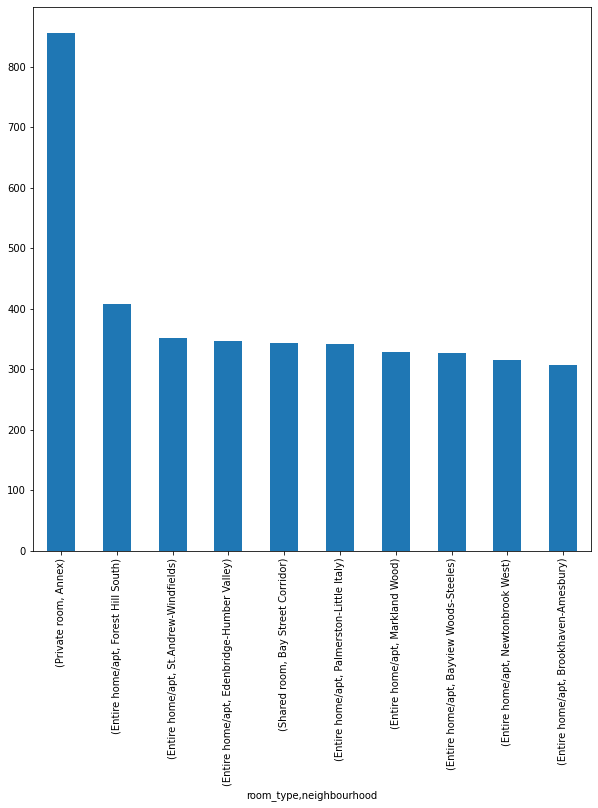

In [107]:
# ver preços por tipo de acomodacao, na média
df.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10))

In [ ]:
# ver media de preços por tipo de acomodacao, no bairro Annex
#df.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10))


Aqui mostramos um panorama das locações na cidade de Toronto, utilizando os dados de geolocalização fornecidos no dataset.

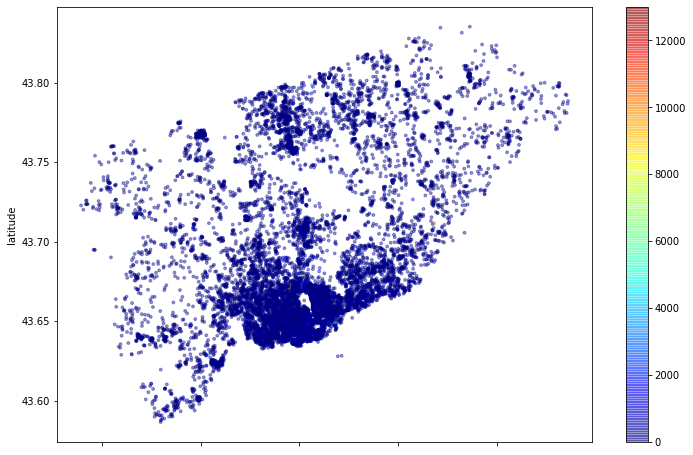

In [15]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do mínimo de noites aceitas em Toronto.

In [16]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

26.31079221545115

## Análise sem outliers

Vamos analisar o *dataset* em busca de outliers.

In [17]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.526100e+04,1.526100e+04,0.0,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,11775.000000,15261.000000,15261.000000,15261.000000
mean,3.090755e+07,1.249332e+08,NaN,43.682025,-79.396518,155.451674,26.310792,26.238320,1.633137,5.178101,131.505799,4.198545
std,1.561377e+07,1.216209e+08,NaN,0.049040,0.065824,371.197012,40.175750,53.502878,4.316384,13.103014,134.985795,11.237775
min,1.419000e+03,1.565000e+03,NaN,43.586490,-79.621200,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.836737e+07,2.262621e+07,NaN,43.645600,-79.425980,67.000000,5.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,3.249823e+07,7.992063e+07,NaN,43.663290,-79.396530,101.000000,28.000000,5.000000,0.550000,1.000000,87.000000,0.000000
75%,4.450433e+07,2.093466e+08,NaN,43.703990,-79.375700,165.000000,28.000000,26.000000,1.630000,4.000000,251.000000,3.000000
max,5.368448e+07,4.344476e+08,NaN,43.835260,-79.128010,13000.000000,1125.000000,828.000000,153.000000,123.000000,365.000000,188.000000


Avaliando os dados do resumo estatísticos podemos perceber uma discrepância nos valores máximos das variáveis `price` e `minimun_nights`.

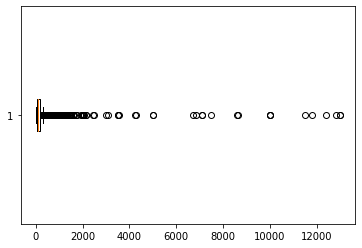

In [18]:
plt.boxplot(x=df['price'],vert=False);

In [19]:
df_clean = df.copy()

### defininfo IQR do dataset

o IQR (do inglês InterQuartile Range) é a métrica de disperção estatística. 

In [24]:
# identificando Q1 e Q3 da variável price
Q1 = df.price.quantile(.25)
Q3 = df.price.quantile(.75)

# calulo IQR da variável price
IQR = Q3 - Q1
print('IQR: ', IQR)

# definindo limites Q1 e Q3                                  
lim_sup = Q3 + 1.5 * IQR
lim_inf = Q1 - 1.5 * IQR

print('Limite superior Q3: ', lim_sup)
print('Limite inferior Q1: ', lim_inf)

IQR:  98.0
Limite superior Q3:  312.0
Limite inferior Q1:  -80.0


O limite inferior negativo sugere que tenhamos preços de imóveis iguais a 0. Vamos verificar.

In [21]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
10797,42738772,Residence & Conference Centre - Toronto,332023628,NaN,NaN,Hillcrest Village,43.796330,-79.346740,Hotel room,0,28,0,NaN,NaN,1,0,0,NaN
11027,43309343,Residence & Conference Centre - Toronto Downtown,316829844,Residence & Conference Centre,NaN,Waterfront Communities-The Island,43.654440,-79.356320,Hotel room,0,28,0,NaN,NaN,1,0,0,NaN
12652,48483693,Sandman Signature Toronto Airport Hotel,391270306,Ghyath,NaN,West Humber-Clairville,43.690096,-79.590907,Hotel room,0,28,0,NaN,NaN,1,0,0,NaN


Eliminaremos os registros onde os preços que sejam iguais a 0.

In [23]:
# Eliminando registros com precos iguais a 0
df_clean.drop(df_clean[df_clean['price'] == 0].index,inplace=True)
df_clean[df_clean['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license


Eliminaremos os registros onde os preços que sejam superiores a Q3.

In [26]:
# eliminando precos maiores que Q3
df_clean.drop(df_clean[df_clean['price'] > lim_sup].index,inplace=True)
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.427500e+04,1.427500e+04,0.0,14275.000000,14275.000000,14275.000000,14275.000000,14275.000000,11091.000000,14275.000000,14275.000000,14275.000000
mean,3.090383e+07,1.248758e+08,NaN,43.682972,-79.396759,113.769667,26.541226,26.687776,1.652056,5.224448,128.869912,4.277128
std,1.559971e+07,1.214480e+08,NaN,0.049540,0.066694,64.153862,40.700947,54.243457,4.397537,13.347210,134.037506,11.462165
min,8.077000e+03,1.413500e+04,NaN,43.586490,-79.621200,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.840181e+07,2.265463e+07,NaN,43.646150,-79.427420,65.000000,5.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,3.240815e+07,8.020299e+07,NaN,43.664070,-79.396980,100.000000,28.000000,6.000000,0.550000,1.000000,83.000000,0.000000
75%,4.447752e+07,2.089256e+08,NaN,43.706490,-79.375470,150.000000,28.000000,27.000000,1.620000,4.000000,248.000000,3.000000
max,5.368448e+07,4.344476e+08,NaN,43.835260,-79.128010,312.000000,1125.000000,828.000000,153.000000,123.000000,365.000000,188.000000


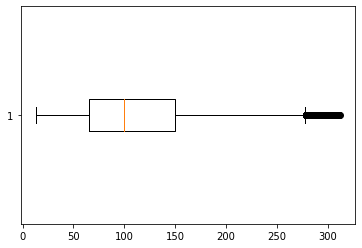

In [29]:
plt.boxplot(x=df_clean['price'],vert=False);

In [35]:
df.price.count()

15261

In [34]:
df_clean.price.count()

14275

Agora vamos verificar a variável `minimun_nights`

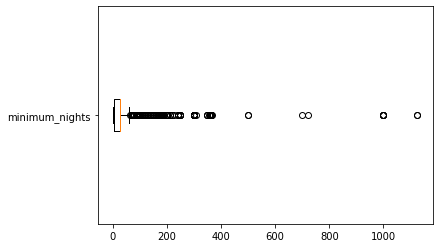

In [36]:
plt.boxplot(x=df['minimum_nights'],vert=False,labels=['minimum_nights']);

E vamos executar os mesmo procedimentos de identificacao do IQR.

In [41]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.526100e+04,1.526100e+04,0.0,15261.000000,15261.000000,15261.000000,15261.000000,15261.000000,11775.000000,15261.000000,15261.000000,15261.000000
mean,3.090755e+07,1.249332e+08,NaN,43.682025,-79.396518,155.451674,26.310792,26.238320,1.633137,5.178101,131.505799,4.198545
std,1.561377e+07,1.216209e+08,NaN,0.049040,0.065824,371.197012,40.175750,53.502878,4.316384,13.103014,134.985795,11.237775
min,1.419000e+03,1.565000e+03,NaN,43.586490,-79.621200,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.836737e+07,2.262621e+07,NaN,43.645600,-79.425980,67.000000,5.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,3.249823e+07,7.992063e+07,NaN,43.663290,-79.396530,101.000000,28.000000,5.000000,0.550000,1.000000,87.000000,0.000000
75%,4.450433e+07,2.093466e+08,NaN,43.703990,-79.375700,165.000000,28.000000,26.000000,1.630000,4.000000,251.000000,3.000000
max,5.368448e+07,4.344476e+08,NaN,43.835260,-79.128010,13000.000000,1125.000000,828.000000,153.000000,123.000000,365.000000,188.000000


In [49]:
df.minimum_nights.sort_values(ascending=True)

3929        1
13797       1
11286       1
13799       1
11282       1
         ... 
2857     1000
3564     1000
1462     1000
1166     1124
1628     1125
Name: minimum_nights, Length: 15261, dtype: int64

In [45]:
# identificando Q1 e Q3 da variável minimun_nights
Q1 = df.minimum_nights.quantile(.25)
Q3 = df.minimum_nights.quantile(.75)

# calulo IQR da variável price
IQR = Q3 - Q1
print('IQR: ', IQR)

# definindo limites Q1 e Q3                                  
lim_sup_ngt = Q3 + 1.5 * IQR
lim_inf_ngt = Q1 - 1.5 * IQR

print('Limite superior Q3: ', lim_sup_ngt)
print('Limite inferior Q1: ', lim_inf_ngt)

IQR:  23.0
Limite superior Q3:  62.5
Limite inferior Q1:  -29.5


Novamente o limite inferior negativo sugere que tenhamos registros iguais a 0. Vamos verificar.

In [47]:
df[df['minimum_nights'] >= 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.645900,-79.424230,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.640800,-79.376730,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.698050,-79.454110,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.668840,-79.327250,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.640150,-79.376250,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15256,53676487,"""The Red"" Downtown Toronto 5 Star Location",311812420,Brian,NaN,Kensington-Chinatown,43.651695,-79.399825,Private room,40,7,0,NaN,NaN,1,78,0,STR-2013-JKFASD
15257,53676622,Dragon Ball Inspired Super Cozy Studio Apartment,342073057,Anthony,NaN,Kensington-Chinatown,43.651729,-79.400658,Entire home/apt,59,2,0,NaN,NaN,6,62,0,STR-2013-KFGAWS
15258,53682444,Super North York Location Near Seneca,432674480,Eunice,NaN,Don Valley Village,43.783640,-79.350740,Private room,35,28,0,NaN,NaN,12,365,0,NaN
15259,53682688,Big Private Room in Midtown Toronto,432674480,Eunice,NaN,Mount Pleasant West,43.697744,-79.391323,Private room,36,28,0,NaN,NaN,12,365,0,NaN


No caso desta variável não temos valores menores ou iguais a 0, mas temos muitos imóveis com locação minima de um dia e outros com a quantidade muito acima da média o que causa a discrepancia. Vamos entao remover os registros com valores acima de Q3.

In [50]:
df_clean.drop(df_clean[df_clean['minimum_nights'] > lim_sup_ngt].index,inplace=True)
df_clean.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.378900e+04,1.378900e+04,0.0,13789.000000,13789.000000,13789.000000,13789.000000,13789.000000,10776.000000,13789.000000,13789.000000,13789.000000
mean,3.107546e+07,1.258073e+08,NaN,43.683037,-79.396816,113.980927,21.172891,27.028138,1.683840,5.322213,126.408732,4.416274
std,1.557390e+07,1.218404e+08,NaN,0.049613,0.066966,64.472866,12.342932,54.581225,4.454786,13.522541,133.373510,11.636591
min,2.369100e+04,1.413500e+04,NaN,43.586490,-79.621200,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.861736e+07,2.281351e+07,NaN,43.646210,-79.427620,65.000000,5.000000,1.000000,0.160000,1.000000,0.000000,0.000000
50%,3.271390e+07,8.115127e+07,NaN,43.664090,-79.397070,100.000000,28.000000,6.000000,0.560000,1.000000,80.000000,0.000000
75%,4.463319e+07,2.107643e+08,NaN,43.706620,-79.375330,150.000000,28.000000,27.000000,1.670000,4.000000,242.000000,3.000000
max,5.368448e+07,4.344476e+08,NaN,43.835260,-79.128010,312.000000,62.000000,828.000000,153.000000,123.000000,365.000000,188.000000


In [60]:
df_clean.minimum_nights.values

array([28, 30, 28, ..., 28, 28, 28])

In [51]:
# identificando Q1 e Q3 da variável minimun_nights
Q1 = df_clean.minimum_nights.quantile(.25)
Q3 = df_clean.minimum_nights.quantile(.75)

# calulo IQR da variável price
IQR = Q3 - Q1
print('IQR: ', IQR)

# definindo limites Q1 e Q3                                  
nlim_sup_ngt = Q3 + 1.5 * IQR
nlim_inf_ngt = Q1 - 1.5 * IQR

print('Limite superior Q3: ', nlim_sup_ngt)
print('Limite inferior Q1: ', nlim_inf_ngt)

IQR:  23.0
Limite superior Q3:  62.5
Limite inferior Q1:  -29.5


In [61]:
df.minimum_nights.count()

15261

In [62]:
df_clean.minimum_nights.count()

13789

In [63]:
Q1

5.0

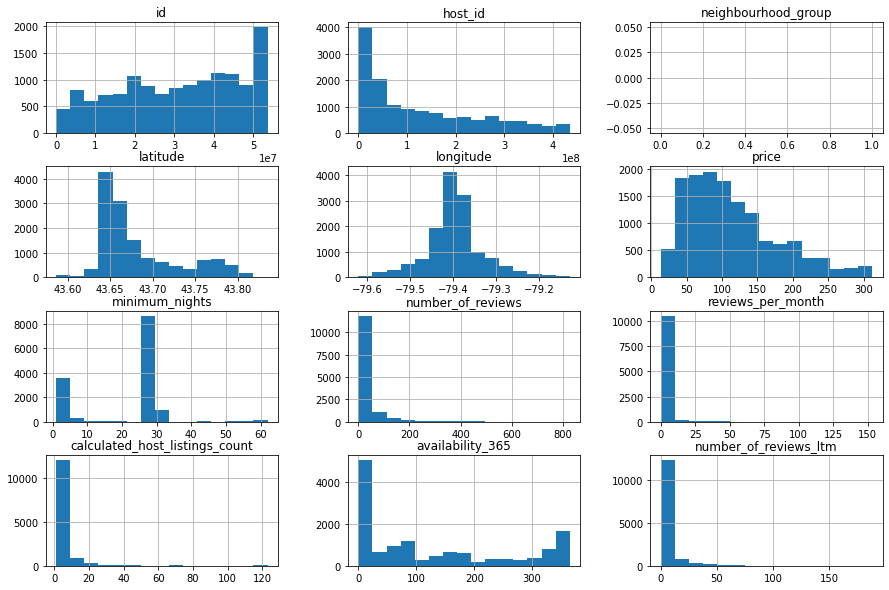

In [64]:
df_clean.hist(bins=15 ,figsize=(15,10));

In [65]:
df.price.mean()

155.4516742022148

In [66]:
df_clean.price.mean()

113.98092682573065

In [67]:
df.minimum_nights.mean()

26.31079221545115

In [68]:
df_clean.minimum_nights.mean()

21.172891435201972

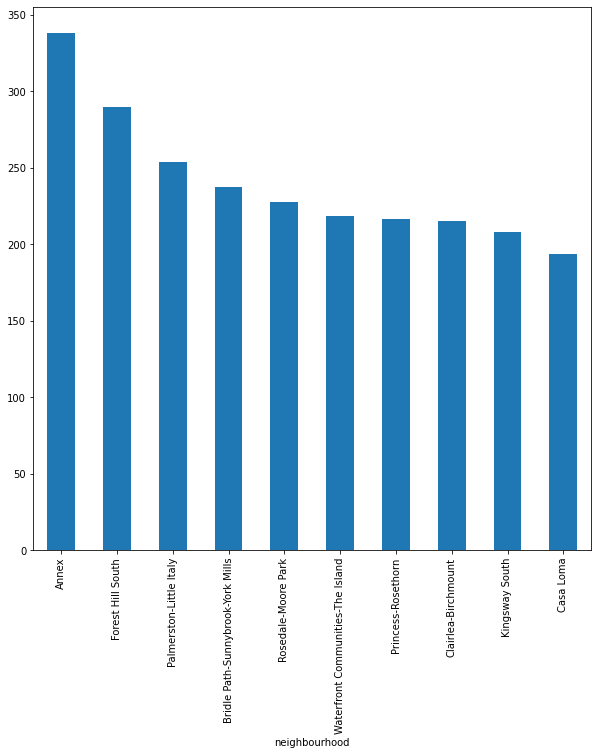

In [95]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10));

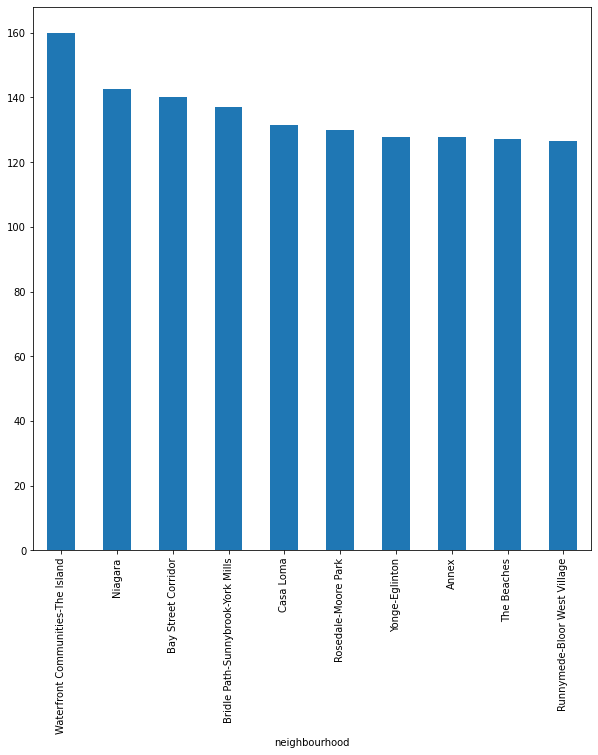

In [96]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10));

In [78]:
# criar uma matriz de correlação
matrix2 = df_clean[['price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(matrix2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.117750,0.031986,0.046706,0.033885
minimum_nights,-0.117750,1.000000,-0.205102,0.037650,-0.101634
number_of_reviews,0.031986,-0.205102,1.000000,-0.070458,0.016383
calculated_host_listings_count,0.046706,0.037650,-0.070458,1.000000,0.149350
availability_365,0.033885,-0.101634,0.016383,0.149350,1.000000


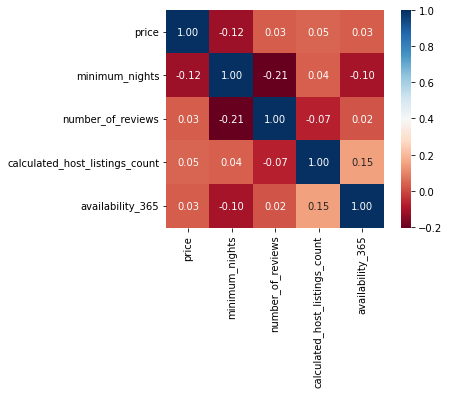

In [99]:
# plotar um heatmap a partir das correlações
sns.heatmap(matrix2, cmap='RdBu', fmt='.2f',square=True, linecolor='white', annot=True);

In [86]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8788
Private room       4800
Shared room         184
Hotel room           17
Name: room_type, dtype: int64

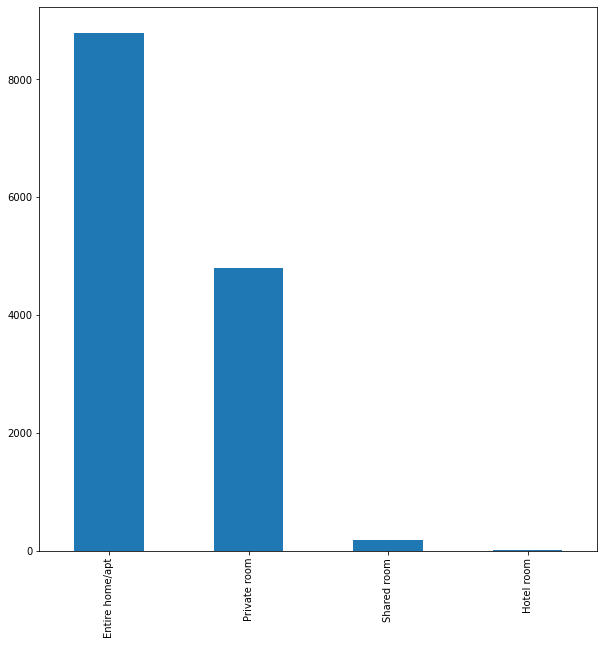

In [93]:
df_clean.room_type.value_counts().plot(kind='bar', figsize=(10,10));

In [88]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    57.584693
Private room       31.452723
Shared room         1.205688
Hotel room          0.111395
Name: room_type, dtype: float64

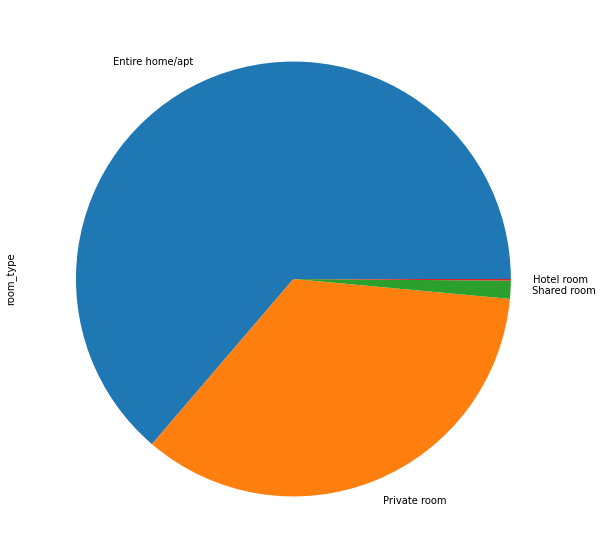

In [92]:
(df_clean.room_type.value_counts() / df.shape[0] * 100).plot(kind='pie', figsize=(10,10));

In [110]:
# ver preços por tipo de acomodacao, na média
df_clean.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10]

room_type        neighbourhood                    
Shared room      Bendale                              300.000000
                 Dorset Park                          194.000000
Entire home/apt  Agincourt North                      169.000000
                 Waterfront Communities-The Island    163.843470
                 Bridle Path-Sunnybrook-York Mills    163.000000
                 Bay Street Corridor                  152.340836
                 Willowdale East                      152.175824
                 Niagara                              151.835240
                 Casa Loma                            150.181818
                 Guildwood                            149.400000
Name: price, dtype: float64

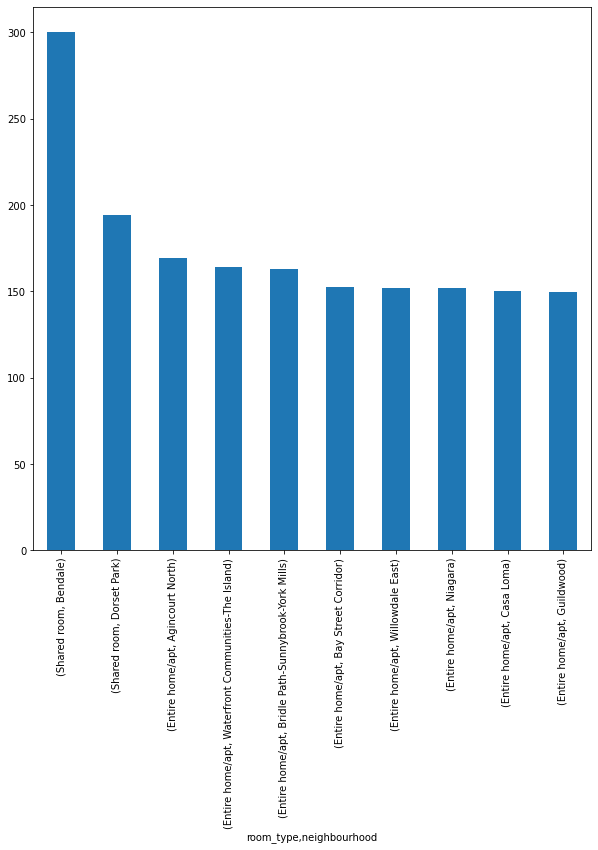

In [108]:
# ver preços por tipo de acomodacao, na média
df_clean.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10))

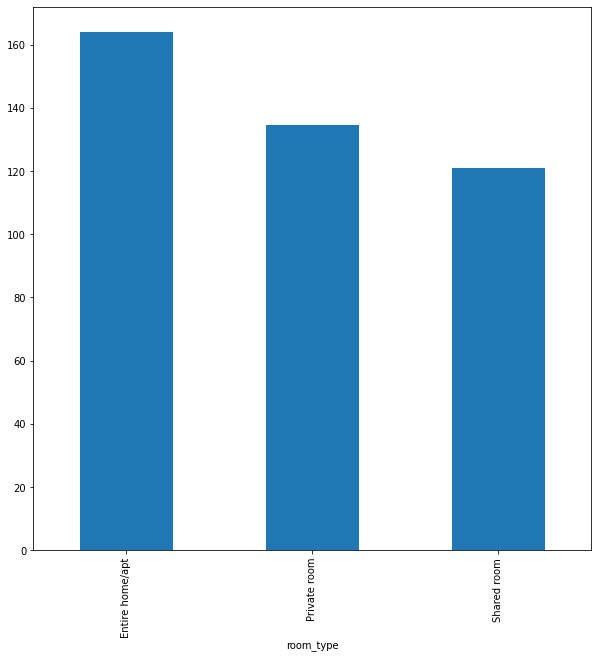

In [122]:
# ver preços por tipo de acomodacao, na média
#df_clean.groupby(['room_type','neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10,10))

#df_clean.neighbourhood['Waterfront Communities-The Island']

#df_clean.groupby(['room_type']).price.mean()
df_clean[df_clean['neighbourhood'] == 'Waterfront Communities-The Island'].groupby(['room_type']).price.mean().plot(kind='bar', figsize=(10,10));

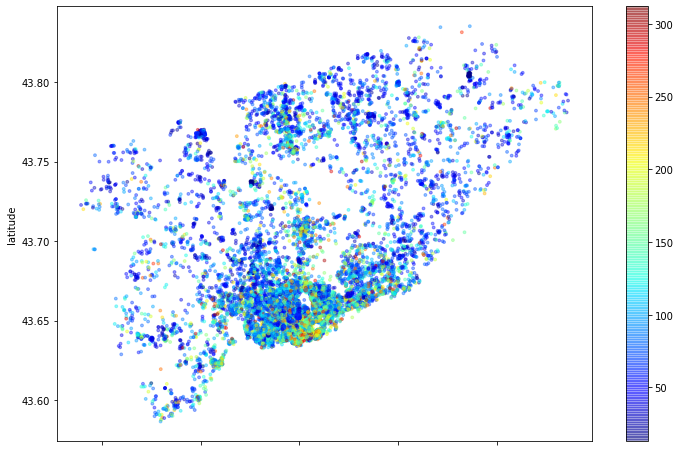

In [98]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

O Airbnb além de ser um ótimo local para alugar um espaço para viagens, também fornece dados de diversas cidades para a análise, como a apresentada. Os preços das locações não são caras, em média US$ 113,00, se comparada à outras cidades grandes. A descrição dos bairros é bastante convidativa para uma viagem. Verificamos que existem muitas propriedades disponíveis para locação, sendo grande parte delas para viagens longas por cerca de 21 dias, porém bastante concorridas.
Em relação à análise de dados em si, foi possível verificar a importância da atenção aos outliers em um dataset. O impacto nos resultados da pesquisa e análise é impressionante e será determinante para o sucesso ao não do estudo.
